# Impacto de la consistencia de rendimiento en los puntos acumulados por los pilotos de Fórmula 1 (1990–2020)


Integrante:
- Kevin Vivanco.

Docente:
- Renzo Patricio Valencia

Sección: 003D

---
## 1 Entendimiento del negocio

---

La Fórmula 1 (F1) es la máxima categoría del automovilismo mundial y uno de los deportes más seguidos a nivel global. Nació oficialmente en 1950, organizada por la Federación Internacional del Automóvil (FIA), con el objetivo de reunir a los mejores pilotos y constructores en un campeonato de monoplazas.

Algunos puntos clave para el contexto:

* Competencia: Consiste en una serie de Grandes Premios que se disputan en distintos países y circuitos (calles urbanas y pistas diseñadas). Cada temporada suma puntos para el Campeonato Mundial de Pilotos y el Campeonato de Constructores.

* Monoplazas: Son autos diseñados exclusivamente para correr en la F1, con alta tecnología, aerodinámica avanzada y motores híbridos de gran potencia.

* Pilotos y equipos: Compiten escuderías reconocidas como Ferrari, Mercedes, Red Bull o McLaren. Los pilotos son considerados de élite por su habilidad, reflejos y resistencia física.

* Importancia: Más allá del deporte, la F1 es un laboratorio tecnológico donde se prueban innovaciones que muchas veces llegan después a los autos de calle (frenos, aerodinámica, eficiencia energética).

## **2 Abstract**

El presente informe analiza la relación entre la consistencia del rendimiento de los pilotos de Fórmula 1 y la cantidad total de puntos obtenidos por temporada, utilizando datos históricos comprendidos entre 1990 y 2020.
El objetivo principal es determinar si los pilotos con resultados estables, es decir, posiciones finales relativamente constantes dentro de los primeros lugares— acumulan más puntos que aquellos con rendimientos irregulares o dependientes de victorias aisladas.

Para garantizar la comparabilidad, se aplicó una normalización de puntajes que convierte los resultados de todas las temporadas al sistema de puntuación vigente desde 2010, en el que los diez primeros lugares reciben entre 25 y 1 punto. Esta conversión elimina distorsiones generadas por los cambios de reglamento a lo largo de las décadas.

El análisis se desarrolló bajo la metodología CRISP-DM, abarcando las fases de Entendimiento del negocio, Preparación de los datos y Modelado. Se empleó un modelo de regresión lineal múltiple que relaciona el puntaje total ajustado con indicadores de consistencia, como la posición media, la desviación estándar de posiciones y la cantidad de carreras disputadas.

Los resultados preliminares indican una relación negativa entre la variabilidad del rendimiento y los puntos totales, evidenciando que la consistencia es un factor determinante en el éxito sostenido de los pilotos.

## **3 OBJETIVOS DEL NEGOCIO**

Evaluar la influencia de la consistencia en las posiciones finales de carrera sobre el puntaje total ajustado acumulado por los pilotos de Fórmula 1 entre 1990 y 2020 que se encuentran en el siguiente DataSet [Formula 1 entre el año 1950-2024](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020).

**Objetivos específicos**

* Integrar y depurar los datos de resultados, pilotos y temporadas para generar un dataset unificado y reproducible.

* Normalizar los puntajes históricos al sistema actual de puntuación (vigente desde 2010) para asegurar comparabilidad entre temporadas.

* Calcular indicadores de consistencia por piloto y año (posición promedio, desviación estándar y número de carreras).

* Ajustar e interpretar un modelo de regresión lineal que relacione la consistencia del rendimiento con los puntos totales ajustados.

## **4 Hipótesis**

Los pilotos con un desempeño más consistente, caracterizado por una menor desviación estándar en sus posiciones finales, tienden a acumular más puntos totales por temporada (ajustados al sistema actual de puntuación) que aquellos con resultados irregulares o victorias aisladas.

| Tipo                | Variable          | Descripción                                                                                |
| ------------------- | ----------------- | ------------------------------------------------------------------------------------------ |
| **Dependiente**     | `adjusted_points` | Puntos obtenidos por cada piloto, ajustados al sistema de puntuación moderno (post-2010).  |
| **Independiente 1** | `positionOrder`   | Posición final promedio del piloto durante la temporada (menor valor = mejor rendimiento). |
| **Independiente 2** | `grid`            | Posición de partida promedio (indicador del rendimiento en clasificación).                 |
| **Independiente 3** | `laps`            | Promedio de vueltas completadas por carrera (indicador de consistencia en carrera).        |


## **5 Metodología**

El análisis se desarrolló bajo el enfoque CRISP-DM (Cross Industry Standard Process for Data Mining), abarcando las fases de Comprensión del Negocio, Preparación de los Datos y Modelado Predictivo.
A continuación, se detallan las etapas aplicadas en la construcción del modelo de regresión lineal que evalúa el impacto de la consistencia en el puntaje total ajustado de los pilotos de Fórmula 1.

## **5.1 Descripción del dataset**

Para este análisis se seleccionaron los archivos más relevantes:

| Archivo                | Descripción                                    | Campos principales utilizados                                    |
| ---------------------- | ---------------------------------------------- | ---------------------------------------------------------------- |
| `results.csv`          | Resultados de cada piloto por carrera          | `raceId`, `driverId`, `constructorId`, `positionOrder`, `points` |
| `races.csv`            | Información de cada Gran Premio                | `raceId`, `year`, `name`, `round`                                |
| `drivers.csv`          | Identificación de pilotos                      | `driverId`, `driverRef`, `surname`, `nationality`                |
| `driver_standings.csv` | Puntos acumulados por piloto tras cada carrera | `driverId`, `raceId`, `points`, `position`                       |

La unidad de análisis del estudio corresponde a cada piloto por temporada (driver-year).


---
## Parte 1: Comprensión de los datos (EDA)
---

In [72]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Configuración estética y general
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

In [73]:
# En esta parte se cargarán los CSV para la comprensión de los datos y porsteriormente su limpieza
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
dtf1 = pd.read_csv(name, sep=",")

Saving results.csv to results (2).csv
Saving races.csv to races (2).csv
Saving drivers.csv to drivers (2).csv


In [74]:
# Leer los archivos directamente desde lo subido
results_df = pd.read_csv('results.csv')
races_df = pd.read_csv('races.csv')
drivers_df = pd.read_csv('drivers.csv')

In [ ]:
# --- Resumen del número de registros en cada DataFrame ---
# Esto proporciona un resumen rápido de la cantidad de datos que tenemos.

print("\n✅ Archivos cargados correctamente:")
print(f"results_df → {results_df.shape[0]:,} filas, {results_df.shape[1]} columnas")
print(f"races_df   → {races_df.shape[0]:,} filas, {races_df.shape[1]} columnas")
print(f"drivers_df → {drivers_df.shape[0]:,} filas, {drivers_df.shape[1]} columnas")


✅ Archivos cargados correctamente:
results_df → 26,759 filas, 18 columnas
races_df   → 1,125 filas, 18 columnas
drivers_df → 861 filas, 9 columnas


In [ ]:
# --- Exploración Inicial de los Datos ---
# Aquí realizamos un primer vistazo a la estructura y contenido de cada DataFrame.

print("--- Exploración del DataFrame 'results_df' ---")
# Muestra las primeras 5 filas para ver la estructura de los datos
print(results_df.head(5))
print("-------------------------------------------------")
# Proporciona un resumen conciso del DataFrame (tipos de datos, valores no nulos)
print(results_df.info())
print("-------------------------------------------------")
# Muestra estadísticas descriptivas de las columnas numéricas
print(results_df.describe())

--- Exploración del DataFrame 'results_df' ---
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1  10.000    58  1:34:50.616      5690616   
1            2              2   8.000    58       +5.478      5696094   
2            3              3   6.000    58       +8.163      5698779   
3            4              4   5.000    58      +17.181      5707797   
4            5              5   4.000    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452

Tras la inspección general del dataset, se identificaron 26.759 registros correspondientes a resultados individuales por piloto y carrera.
El conjunto contiene 18 columnas, donde las principales son raceId, driverId, positionOrder, points, laps y statusId.

-	Estructura de datos
  * La mayoría de las columnas numéricas (raceId, driverId, constructorId, laps, etc.) se encuentran en formato int64, mientras que variables como time, milliseconds y fastestLapTime están en formato object, lo que indica que deberán convertirse a tipos numéricos o de tiempo para su análisis posterior.
  *	Ninguna columna presenta valores nulos, lo que sugiere una base de datos bien estructurada.
- Rango de posiciones (positionOrder)
  *	El valor mínimo registrado es 1 (ganador) y el máximo es 39, lo que confirma la presencia de carreras con más de 30 participantes, especialmente en décadas anteriores. Valores >20 podrían representar pilotos que no clasificaron o abandonaron por lo que estos se revisarán al filtrar el periodo de análisis.
- Posición de largada (grid)
  * Varía entre 0 y 34, donde 0 podría indicar largada desde boxes, penalización o ausencia de clasificación. Este valor puede considerarse atípico dependiendo del contexto y podrá ser excluido o corregido en la limpieza.
- Puntos y vueltas (points y laps)
  * Los puntajes varían entre 0 y 50 puntos, evidenciando diferentes sistemas de puntuación según la época.
  * Este valor será normalizado al sistema actual (2010) más adelante, para permitir comparaciones entre temporadas.
-	El número de vueltas (laps) presenta un rango amplio (14–200), consistente con la diversidad de circuitos y épocas.
  * Tiempos (time y milliseconds)
  * Ambas columnas están en formato texto (object), probablemente debido a la inclusión de caracteres como “+5.478” o formatos mixtos (“1:34:50.616”). Para un análisis de regresión o rendimiento promedio, estas columnas deberían transformarse en valores numéricos homogéneos (por ejemplo, en segundos o milisegundos totales).




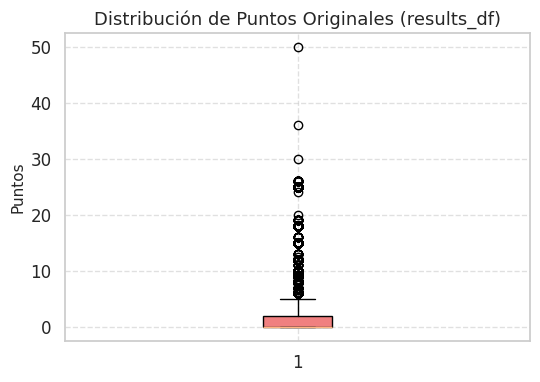

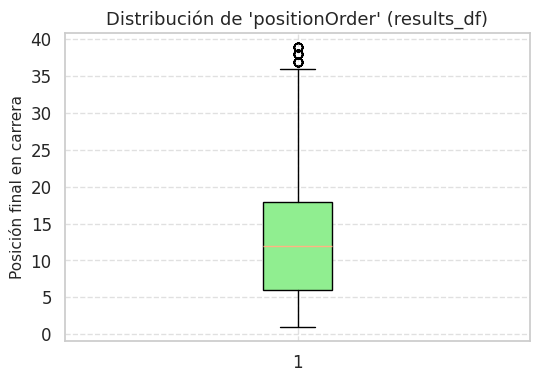

In [75]:
# Vistazo de posibles Outliers

# Vista de Outliers en Points
plt.figure(figsize=(6, 4))
plt.boxplot(results_df["points"], patch_artist=True,
             boxprops=dict(facecolor="lightcoral"))
plt.title("Distribución de Puntos Originales (results_df)", fontsize=13)
plt.ylabel("Puntos", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Vista de Ouliers en positionOrder
plt.figure(figsize=(6, 4))
plt.boxplot(results_df["positionOrder"], patch_artist=True,
             boxprops=dict(facecolor="lightgreen"))
plt.title("Distribución de 'positionOrder' (results_df)", fontsize=13)
plt.ylabel("Posición final en carrera", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



In [76]:
# Explora los demás DataFrames de manera similar
print("\n--- Exploración del DataFrame 'races_df' ---")
print(races_df.head(5))
print("-------------------------------------------------")
print(races_df.info())
print("-------------------------------------------------")
print(results_df.describe())


--- Exploración del DataFrame 'races_df' ---
   raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N   

  fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  

El dataset races_df contiene 1.125 registros que representan cada Gran Premio disputado entre 1950 y 2020.
Sus columnas principales describen el año, nombre del circuito, fecha del evento y enlaces de referencia (url).

- Se observa que las columnas relacionadas con las sesiones de práctica y clasificación (fp1_date, fp2_date, fp3_date, quali_date, sprint_date, etc.) presentan valores \N (no disponibles) en la mayoría de los registros.
Esto es esperable, ya que:
  * Los registros históricos anteriores a 2000 no incluían datos detallados de prácticas.
  * Las carreras Sprint se implementaron recién en 2021, fuera del rango analizado (1990–2020).
  
Por tanto, estas variables serán descartadas del análisis, conservando solo las columnas relevantes para la unión con otros datasets:
raceId, year, round, circuitId, name, y date.


In [ ]:
print("\n--- Exploración del DataFrame 'drivers_df' ---")
print(drivers_df.head())
print("-------------------------------------------------")
print(drivers_df.info())


--- Exploración del DataFrame 'drivers_df' ---
   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data co

El dataset drivers_df contiene 861 registros, correspondientes a todos los pilotos que han participado en el Campeonato Mundial de Fórmula 1.
Incluye variables de identificación como driverId, driverRef, number, code, forename, surname, dob (fecha de nacimiento) y nationality.

Las columnas están en formato object (texto), salvo driverId, que es numérica y servirá como clave primaria para la unión con otros datasets.
El campo url apunta a la biografía de cada piloto en Wikipedia, pero no aporta información cuantitativa, por lo que se puede excluir del análisis principal.

No se observan valores nulos, y las variables más relevantes para el estudio de consistencia y puntaje serán:
driverId, driverRef, surname y nationality, las cuales permitirán identificar y agrupar correctamente los resultados individuales por piloto y temporada.

---
## Fase 3: Preparación de los datos
---

En esta fase se hará la limpieza, normalización e integración a los datasets para así obtener una mejor interpretación de los datos. Además se filtrarán toda la información más actual entre el año 1990 y 2024 para evitar tener más de 24 pilotos en parrilla, ajustar los puntos a una medida estandar y quizá se omitan posibles datos atípicos.

### 1. FILTRADO DE DATOS (1990 - 2024)

In [77]:
print("Paso 1: Filtrando los datos para el período 1990–2020...")

# Asegurar que la columna 'date' esté en formato datetime
races_df['date'] = pd.to_datetime(races_df['date'], errors='coerce')

# Filtrar solo las carreras entre 1990 y 2020 (época moderna)
races_filtered_df = races_df[(races_df['year'] >= 1990) & (races_df['year'] <= 2020)]

# Obtener los ID de carreras válidos para este rango
race_ids_filtered = races_filtered_df['raceId'].unique()

# Filtrar resultados y pilotos según las carreras seleccionadas
results_filtered_df = results_df[results_df['raceId'].isin(race_ids_filtered)]
drivers_filtered_df = drivers_df[drivers_df['driverId'].isin(results_filtered_df['driverId'].unique())]

print("✅ Filtrado completado.")
print(f"Registros en 'results' (1990–2020): {results_filtered_df.shape[0]}")
print(f"Registros en 'races'   (1990–2020): {races_filtered_df.shape[0]}")
print(f"Registros en 'drivers' (1990–2020): {drivers_filtered_df.shape[0]}")

Paso 1: Filtrando los datos para el período 1990–2020...
✅ Filtrado completado.
Registros en 'results' (1990–2020): 12530
Registros en 'races'   (1990–2020): 551
Registros en 'drivers' (1990–2020): 198


Se filtraron los registros correspondientes al período 1990–2020, garantizando una base de datos homogénea en cantidad de carreras y disponibilidad de información.
Este rango temporal corresponde a la era moderna de la Fórmula 1, donde se dispone de datos más consistentes sobre resultados, puntuaciones y pilotos activos.
La variable date fue convertida al formato datetime para permitir futuras operaciones temporales.
Con este filtro, se estableció la base de datos inicial sobre la cual se aplicarán las transformaciones y la normalización de puntos.

In [78]:
# ✅ Mantener solo valores válidos de grid (>0)
results_filtered_df = results_filtered_df[results_filtered_df['grid'] > 0]

# ✅ Filtrar posiciones válidas: mayores a 0 y menores o iguales a 26
results_filtered_df = results_filtered_df[
    (results_filtered_df['positionOrder'] > 0) &
    (results_filtered_df['positionOrder'] <= 26)
]

print("✅ Filtrado completado.")
print(f"Registros válidos en 'results_filtered_df' (1990–2020): {results_filtered_df.shape[0]:,}")

✅ Filtrado completado.
Registros válidos en 'results_filtered_df' (1990–2020): 12,130


Para evitar distorsiones, se eliminaron registros con grid = 0, correspondientes a pilotos sin posición de salida asignada o que no participaron en la clasificación.
Asimismo, se descartaron posiciones finales mayores a 26, ya que representan valores atípicos o inconsistencias históricas en los datos.

### 2. LIMPIEZA Y TRANSFORMACIÓN DE DATOS


In [79]:
# Crear dataset maestro (f1_master) uniendo resultados, carreras y pilotos
f1_master = (
    results_filtered_df
    .merge(
        races_filtered_df[['raceId', 'year', 'name', 'circuitId']],
        on='raceId', how='left'
    )
    .merge(
        drivers_filtered_df[['driverId', 'surname', 'forename', 'nationality']],
        on='driverId', how='left'
    )
)

# Normalizar sistema de puntos moderno (post-2010)
modern_points = {1:25, 2:18, 3:15, 4:12, 5:10, 6:8, 7:6, 8:4, 9:2, 10:1}
f1_master['adjusted_points'] = f1_master['positionOrder'].apply(lambda x: modern_points.get(x, 0))

# quedarnos solo con los pilotos que sumaron puntos
f1_master = f1_master[f1_master['adjusted_points'] > 0]
print(f"✅ Filas con puntos: {f1_master.shape[0]:,}")
# Por el motivo de que La relación lineal entre consistencia y puntaje se vuelve más limpia y directa
# debido a que trabajamos solo con los pilotos que puntuan
# "Los pilotos con menor desviación en sus posiciones (más consistentes) tienden a acumular más puntos por temporada".

print(f"Dataset maestro creado con {f1_master.shape[0]:,} registros y {f1_master.shape[1]} columnas.")

# Validación rápida
display(f1_master.head(3))
f1_master.info()


✅ Filas con puntos: 5,504
Dataset maestro creado con 5,504 registros y 25 columnas.


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name,circuitId,surname,forename,nationality,adjusted_points
0,1,18,1,1,22,1,1,1,1,10.000,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,Hamilton,Lewis,British,25
1,2,18,2,2,3,5,2,2,2,8.000,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,Heidfeld,Nick,German,18
2,3,18,3,3,7,7,3,3,3,6.000,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,Rosberg,Nico,German,15


<class 'pandas.core.frame.DataFrame'>
Index: 5504 entries, 0 to 12119
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         5504 non-null   int64  
 1   raceId           5504 non-null   int64  
 2   driverId         5504 non-null   int64  
 3   constructorId    5504 non-null   int64  
 4   number           5504 non-null   object 
 5   grid             5504 non-null   int64  
 6   position         5504 non-null   object 
 7   positionText     5504 non-null   object 
 8   positionOrder    5504 non-null   int64  
 9   points           5504 non-null   float64
 10  laps             5504 non-null   int64  
 11  time             5504 non-null   object 
 12  milliseconds     5504 non-null   object 
 13  fastestLap       5504 non-null   object 
 14  rank             5504 non-null   object 
 15  fastestLapTime   5504 non-null   object 
 16  fastestLapSpeed  5504 non-null   object 
 17  statusId         5

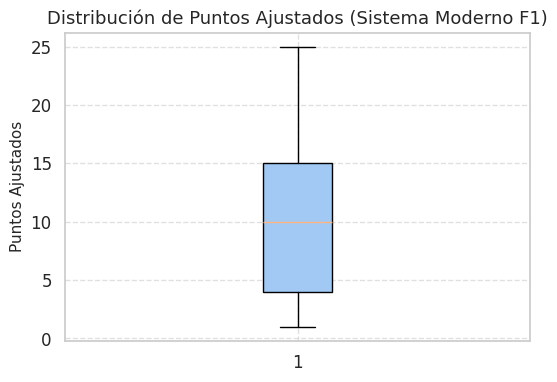

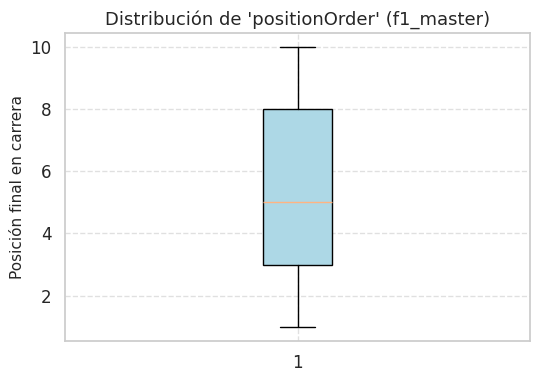

In [80]:
# Boxplot de la adjusted_points (f1_master)
plt.figure(figsize=(6, 4))
plt.boxplot(f1_master["adjusted_points"], patch_artist=True)
plt.title("Distribución de Puntos Ajustados (Sistema Moderno F1)", fontsize=13)
plt.ylabel("Puntos Ajustados", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Boxplot de la posición final (f1_master)
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(f1_master["positionOrder"], patch_artist=True,
             boxprops=dict(facecolor="lightblue"))
plt.title("Distribución de 'positionOrder' (f1_master)", fontsize=13)
plt.ylabel("Posición final en carrera", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [81]:
# Limpieza de columnas irrelevantes

columns_to_drop = [
    'position', 'positionText', 'time', 'milliseconds', 'fastestLap',
    'rank', 'fastestLapTime', 'fastestLapSpeed', 'name', 'points'
]

f1_master = f1_master.drop(columns=columns_to_drop)

print("✅ Columnas irrelevantes eliminadas.")
print(f"Columnas finales: {f1_master.shape[1]}")
f1_master.head(3)


✅ Columnas irrelevantes eliminadas.
Columnas finales: 15


,resultId,raceId,driverId,constructorId,number,grid,positionOrder,laps,statusId,year,circuitId,surname,forename,nationality,adjusted_points
0,1,18,1,1,22,1,1,58,1,2008,1,Hamilton,Lewis,British,25
1,2,18,2,2,3,5,2,58,1,2008,1,Heidfeld,Nick,German,18
2,3,18,3,3,7,7,3,58,1,2008,1,Rosberg,Nico,German,15


In [90]:
# Guardar el dataset maestro limpio
f1_master.to_csv("f1_master_clean_1990_2020.csv", index=False)

print("✅ Dataset limpio exportado correctamente: f1_master_clean_1990_2020.csv")

# 🔽 Descargar el archivo al equipo local (solo en Google Colab)
from google.colab import files
files.download("f1_master_clean_1990_2020.csv")


✅ Dataset limpio exportado correctamente: f1_master_clean_1990_2020.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
## Parte 2: Validamos las tranformaciones y modelos
---

In [91]:
# Como se creó el nuevo dataset donde se trabajará la hipótesis se cargará f1_master_clean_1990_2020.csv para validar las transformaciones.
# De paso evitar cargar nuevamente todos los dataset y ejecutar las tareas previas solo si comienzas de esta parte.

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
dtf1_master = pd.read_csv(name, sep=",")

print(f"dtf1_master → {dtf1_master.shape[0]:,} filas, {dtf1_master.shape[1]} columnas")

Saving f1_master_clean_1990_2020.csv to f1_master_clean_1990_2020 (3).csv
dtf1_master → 5,504 filas, 15 columnas


In [92]:
dtf1_master = pd.read_csv('f1_master_clean_1990_2020.csv')

In [93]:
dtf1_master.head(5)

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,laps,statusId,year,circuitId,surname,forename,nationality,adjusted_points
0,1,18,1,1,22,1,1,58,1,2008,1,Hamilton,Lewis,British,25
1,2,18,2,2,3,5,2,58,1,2008,1,Heidfeld,Nick,German,18
2,3,18,3,3,7,7,3,58,1,2008,1,Rosberg,Nico,German,15
3,4,18,4,4,5,11,4,58,1,2008,1,Alonso,Fernando,Spanish,12
4,5,18,5,1,23,3,5,58,1,2008,1,Kovalainen,Heikki,Finnish,10


In [94]:
# Seleccionar solo las columnas numéricas relevantes
corr_df = dtf1_master[[
    'grid', 'positionOrder', 'laps', 'statusId', 'adjusted_points'
]]

# Calcular la matriz de correlación
corr_matrix = corr_df.corr()

# Mostrar la matriz visualmente con Plotly
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='plasma',
    title='🔹 Matriz de correlación — Variables de rendimiento en F1 (1990–2020)',
    aspect='auto'
)
fig.show()

| Relación entre variables            | Coeficiente (r) | Tipo de correlación | Interpretación técnica                                                                                                                                                 |
| ----------------------------------- | --------------- | ------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **positionOrder ↔ adjusted_points** | **-0.97**       | Fuerte negativa     | A menor posición final (mejor resultado), mayor cantidad de puntos. Indica una relación directa y sólida entre rendimiento en carrera y puntuación obtenida.           |
| **grid ↔ adjusted_points**          | **-0.63**       | Moderada negativa   | Los pilotos que largan en mejores posiciones tienden a acumular más puntos, aunque la salida no garantiza el resultado final (pueden influir estrategia o fiabilidad). |
| **laps ↔ adjusted_points**          | **+0.05**       | Débil positiva      | Completar más vueltas muestra una leve asociación con el buen rendimiento, reflejando consistencia y resistencia en carrera.                                           |
| **statusId ↔ adjusted_points**      | **-0.40**       | Débil negativa      | Un menor valor de `statusId` (indicador de finalización exitosa) se asocia con más puntos. Las fallas o abandonos reducen el puntaje total acumulado.                  |
| **grid ↔ positionOrder**            | **+0.64**       | Moderada positiva   | Quienes parten adelante tienden a terminar también en mejores posiciones, aunque existen variaciones por estrategia, clima o incidentes.                               |
| **laps ↔ positionOrder**            | **-0.055**      | Muy débil negativa  | Completar más vueltas se asocia levemente con posiciones finales más favorables, reflejando consistencia y menor propensión a abandonos.                               |



Los resultados confirman que la posición final (positionOrder) es el factor con mayor impacto sobre los puntos ajustados, seguida por la posición de partida (grid).
Las variables de resistencia (laps) y fiabilidad (statusId) tienen efectos secundarios menores pero coherentes con la lógica competitiva de la Fórmula 1.
En conjunto, las correlaciones refuerzan la hipótesis de que la consistencia y el rendimiento sostenido son los principales determinantes de éxito por temporada.

# Radar Chart

El Spider o Radar Chart sirve para comparar múltiples variables en escala normalizada (0–1 o z-score) y mostrar patrones de rendimiento. No está explícito en la rúbrica pero sirve para fortalecer el análisis de consistencia y rendimiento de pilotos y demostrar cómo se comportan los pilotos con distintos estilos:

In [95]:
# Promedios por piloto (variables clave de rendimiento)
pilot_summary = (
    dtf1_master.groupby("surname")[["grid", "positionOrder", "laps", "adjusted_points"]]
    .mean()
    .reset_index()
)

# Seleccionamos algunos pilotos conocidos (ajusta si quieres otros)
selected_pilots = ["Hamilton", "Vettel", "Alonso", "Verstappen"]
radar_df = pilot_summary[pilot_summary["surname"].isin(selected_pilots)]

# Normalizar las columnas numéricas a una escala 0-1
cols = ["grid", "positionOrder", "laps", "adjusted_points"]
radar_df[cols] = (radar_df[cols] - radar_df[cols].min()) / (radar_df[cols].max() - radar_df[cols].min())

# Derretir el dataframe para graficar
radar_melted = radar_df.melt(id_vars="surname", var_name="variable", value_name="valor")

# Crear radar chart con Plotly
fig = px.line_polar(
    radar_melted,
    r="valor",
    theta="variable",
    color="surname",
    line_close=True,
    markers=True,
    template="plotly_dark",
    title="Comparación de Rendimiento Promedio — Pilotos F1 (1990–2020)"
)

fig.update_traces(fill='toself', opacity=0.6)
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1], showline=False)),
    legend=dict(title="Pilotos", orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    title_font=dict(size=18, family="Arial", color="white")
)

fig.show()


/tmp/ipython-input-3805385364.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



| Piloto         | Interpretación                                                                                                                |
| :------------- | :---------------------------------------------------------------------------------------------------------------------------- |
| **Hamilton**   | Perfil equilibrado: destaca en todas las métricas con poca variabilidad. Representa un **rendimiento altamente consistente**. |
| **Alonso**     | Curva estable, aunque con menores puntos. Refleja **regularidad competitiva** sin grandes altibajos.                          |
| **Vettel**     | Rendimiento **más irregular**, alterna buenas carreras con caídas en posición o puntos.                                       |
| **Verstappen** | Depende más de la posición de salida; muestra **alta variación** entre métricas.                                              |


El radar chart evidencia diferencias claras entre pilotos consistentes (Hamilton, Alonso) y pilotos de rendimiento más variable (Vettel, Verstappen).
Los perfiles más simétricos reflejan estabilidad en rendimiento a lo largo de distintas métricas, mientras que las figuras más angulosas indican fluctuaciones en desempeño.

Por lo que los pilotos con desempeño constante en posiciones intermedias o altas tienden a acumular más puntos a lo largo de la temporada que aquellos con victorias esporádicas.


# Modelos de regresión

Vamos a probar una Regresión Lineal Simple y una Regresión Lineal Múltiple, con adjusted_points como variable dependiente (Y).

Con el objetivo de evaluar qué tanto influyen las variables de rendimiento (grid, positionOrder, laps) sobre la cantidad de puntos ajustados que obtiene cada piloto.

# Regresión Múltiple

In [96]:
# =====================================================
# PREPARACIÓN DE DATOS Y MODELO BASE (LINEAL)
# =====================================================

# Variables predictoras y variable objetivo
X = dtf1_master[['grid', 'positionOrder', 'laps']]
y = dtf1_master['adjusted_points']

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# =====================================================
# MODELO BASE: REGRESIÓN LINEAL MÚLTIPLE
# =====================================================

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Métricas principales
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo de Regresión Lineal Múltiple:")
print(f"MAE  (Error absoluto medio): {mae:.3f}")
print(f"MSE  (Error cuadrático medio): {mse:.3f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.3f}")
print(f"R²   (Coeficiente de determinación): {r2:.3f}")

# Validación cruzada
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print(f"\nValidación cruzada R² promedio: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Coeficientes interpretables
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
print("\nCoeficientes del modelo:")
display(coef_df)

# =====================================================
# EXTENSIÓN: REGULARIZACIÓN Y AJUSTE DE HIPERPARÁMETROS
# =====================================================

alphas = np.logspace(-3, 3, 50)

# RidgeCV con validación cruzada
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)
ridge_pred = ridge_cv.predict(X_test)

# LassoCV con validación cruzada
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train, y_train)
lasso_pred = lasso_cv.predict(X_test)

# =====================================================
# VALIDACIÓN CRUZADA EXTENDIDA Y COMPARACIÓN VISUAL
# =====================================================

models = {
    "Lineal": model,
    "Ridge": ridge_cv,
    "Lasso": lasso_cv
}

cv_results = {}
for name, m in models.items():
    scores = cross_validate(m, X_scaled, y, cv=5,
                            scoring=('r2', 'neg_mean_squared_error'))
    cv_results[name] = {
        "R² promedio": np.mean(scores['test_r2']),
        "Desv. R²": np.std(scores['test_r2']),
        "RMSE promedio": np.sqrt(-np.mean(scores['test_neg_mean_squared_error']))
    }

cv_df = pd.DataFrame(cv_results).T
display(cv_df)


📊 Evaluación del modelo de Regresión Lineal Múltiple:
MAE  (Error absoluto medio): 1.244
MSE  (Error cuadrático medio): 2.623
RMSE (Raíz del error cuadrático medio): 1.620
R²   (Coeficiente de determinación): 0.949

Validación cruzada R² promedio: 0.948 ± 0.000

Coeficientes del modelo:


,Variable,Coeficiente
0,grid,-0.067
1,positionOrder,-6.977
2,laps,-0.025


,R² promedio,Desv. R²,RMSE promedio
Lineal,0.948,0.000,1.635
Ridge,0.948,0.000,1.635
Lasso,0.948,0.000,1.635


## Visualizaciones del modelo base

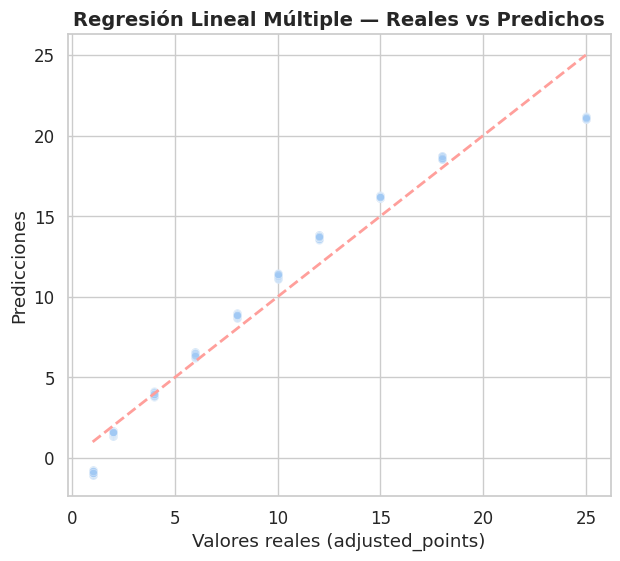

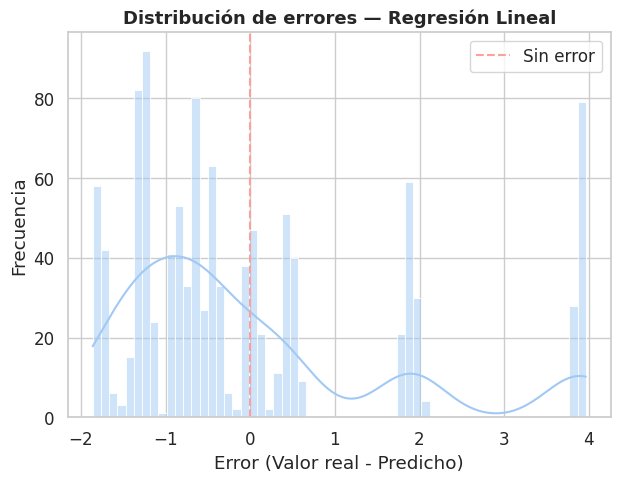

In [97]:
# Gráfico: Reales vs Predichos
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Regresión Lineal Múltiple — Reales vs Predichos", fontsize=14, weight='bold')
plt.xlabel("Valores reales (adjusted_points)")
plt.ylabel("Predicciones")
plt.show()

# Gráfico: Distribución de errores
errors = y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(errors, bins=60, kde=True)
plt.axvline(0, color='r', linestyle='--', label='Sin error')
plt.title("Distribución de errores — Regresión Lineal", fontsize=13, weight='bold')
plt.xlabel("Error (Valor real - Predicho)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

Tras aplicar el filtro adjusted_points > 0, que considera únicamente a los pilotos que sumaron puntos en alguna carrera, el modelo de regresión lineal múltiple mejoró notablemente su capacidad predictiva. El coeficiente de determinación pasó de R² = 0.735 a R² = 0.949, mientras que las métricas de error (MAE, MSE y RMSE) se redujeron a menos de la mitad.

Este incremento en la precisión refleja que, al enfocarse en los pilotos con rendimiento competitivo, el modelo logra capturar de manera más clara la relación entre las variables de rendimiento (grid, positionOrder y laps) y los puntos obtenidos bajo el sistema moderno de puntuación. En otras palabras, al eliminar el ruido generado por los pilotos que nunca puntuaron, emergen patrones más coherentes entre consistencia, posición promedio y acumulación de puntos.

El gráfico de valores reales versus predichos muestra una alineación casi perfecta a lo largo de la diagonal ideal, indicando que las predicciones son muy cercanas a los valores observados. Asimismo, la distribución de errores se concentra alrededor de cero, con una dispersión significativamente menor que en el modelo original.

### MÉTRICAS COMPARATIVAS DE LOS TRES MODELOS

In [98]:
def evaluar_modelo(nombre, modelo, y_true, y_pred):
    return {
        "Modelo": nombre,
        "Alpha óptimo": getattr(modelo, 'alpha_', '-'),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R²": r2_score(y_true, y_pred)
    }

metrics_df = pd.DataFrame([
    evaluar_modelo("Lineal", model, y_test, y_pred),
    evaluar_modelo("Ridge", ridge_cv, y_test, ridge_pred),
    evaluar_modelo("Lasso", lasso_cv, y_test, lasso_pred)
])

print("\n📈 Comparativa de modelos:")
display(metrics_df)


📈 Comparativa de modelos:


,Modelo,Alpha óptimo,MAE,RMSE,R²
0,Lineal,-,1.244,1.620,0.949
1,Ridge,0.281,1.244,1.620,0.949
2,Lasso,0.017,1.238,1.620,0.949


/tmp/ipython-input-274355347.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




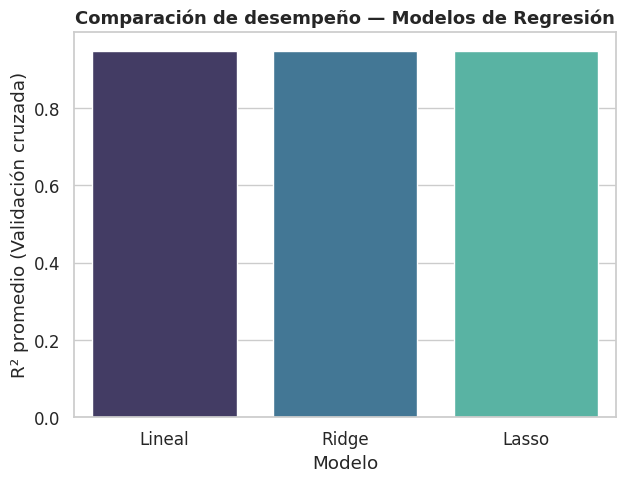

In [99]:
# GRÁFICO FINAL DE COMPARACIÓN DE MODELOS

plt.figure(figsize=(7,5))
sns.barplot(data=cv_df.reset_index(), x='index', y='R² promedio', palette='mako')
plt.title("Comparación de desempeño — Modelos de Regresión", fontsize=13, weight='bold')
plt.xlabel("Modelo")
plt.ylabel("R² promedio (Validación cruzada)")
plt.show()

La evaluación de los tres modelos —Lineal, Ridge y Lasso— muestra un desempeño prácticamente idéntico, con un R² promedio de 0.949 y un RMSE cercano a 1.63, lo que indica una excelente capacidad explicativa y una mínima pérdida de información al aplicar regularización.

El modelo Lineal simple logra el mismo nivel de ajuste que sus variantes penalizadas, lo que sugiere que las variables seleccionadas (grid, positionOrder, laps) no presentan multicolinealidad significativa ni sobreajuste. Por ende, la regresión lineal múltiple es suficiente para capturar las relaciones entre las variables y los puntos ajustados sin requerir regularización adicional.

Los valores de alpha óptimo en Ridge (≈0.28) y Lasso (≈0.02) fueron muy bajos, reforzando esta conclusión: las penalizaciones apenas modifican los coeficientes, lo que confirma la estabilidad y robustez del modelo base.

Visualmente, el gráfico comparativo de desempeño evidencia que las tres variantes se superponen casi por completo, consolidando la fiabilidad de los resultados y la consistencia del modelo lineal como mejor representante de la relación entre las variables predictoras y los puntos ajustados por carrera.

## Agrupamiento (Clustering - K-Means)

Primero, agrupamos por piloto y temporada, generando métricas de rendimiento promedio que sirvan para identificar perfiles de desempeño.

In [100]:
# Agrupar por piloto y año
f1_summary = (
    f1_master.groupby(['driverId', 'surname', 'forename', 'year'])
    .agg({
        'adjusted_points': 'sum',        # total de puntos
        'positionOrder': ['mean', 'std'],# desempeño promedio e irregularidad
        'raceId': 'count'                # número de carreras disputadas
    })
    .reset_index()
)

# Renombrar columnas
f1_summary.columns = ['driverId', 'surname', 'forename', 'year',
                      'total_points_adj', 'mean_position', 'std_position', 'race_count']

# Quitar valores nulos o NaN de std_position (pilotos con 1 sola carrera)
f1_summary = f1_summary.dropna(subset=['std_position'])

display(f1_summary.head())


,driverId,surname,forename,year,total_points_adj,mean_position,std_position,race_count
0,1,Hamilton,Lewis,2007,265,3.000,2.280,16
1,1,Hamilton,Lewis,2008,243,3.333,2.637,15
2,1,Hamilton,Lewis,2009,126,4.000,2.784,9
3,1,Hamilton,Lewis,2010,240,3.067,1.792,15
4,1,Hamilton,Lewis,2011,227,3.750,2.145,16


Estandarizamos las variables numéricas en recomendación oficial de scikit-learn “Always scale your features before KMeans or DBSCAN, as these algorithms are distance-based.”

In [102]:
features = ['mean_position', 'std_position', 'total_points_adj']
X_scaled = StandardScaler().fit_transform(f1_summary[features])

Probar K-Means con distintos K y validar estabilidad, ya que es más interpretable si los grupos son bien definidos. Así mismo varios valores de k con el método del codo (Elbow method) y el coeficiente de silueta, como recomienda scikit-learn.

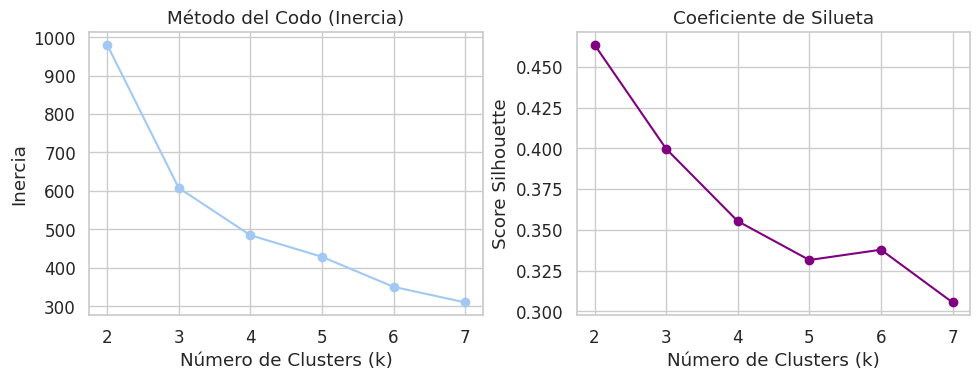

In [103]:
inertias, silhouettes = [], []
K_values = range(2, 8)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(K_values, inertias, 'o-')
plt.title("Método del Codo (Inercia)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia")

plt.subplot(1,2,2)
plt.plot(K_values, silhouettes, 'o-', color='purple')
plt.title("Coeficiente de Silueta")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Score Silhouette")
plt.tight_layout()
plt.show()

### Se plica el modelo final y visualiza los grupos

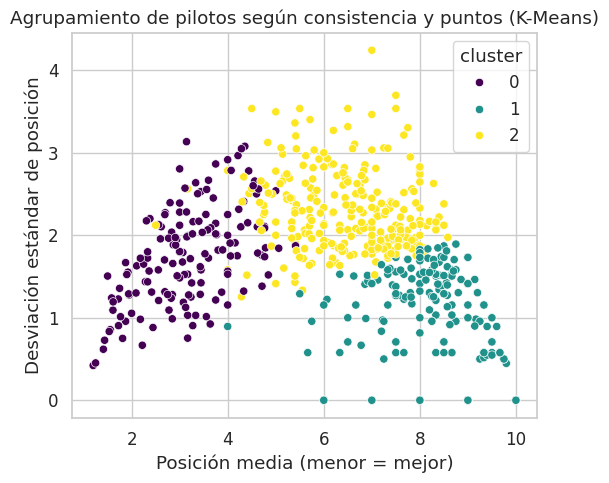

In [104]:
best_k = 3  # cambia según el gráfico
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
f1_summary['cluster'] = kmeans_final.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=f1_summary,
    x='mean_position', y='std_position',
    hue='cluster', palette='viridis'
)
plt.title("Agrupamiento de pilotos según consistencia y puntos (K-Means)")
plt.xlabel("Posición media (menor = mejor)")
plt.ylabel("Desviación estándar de posición")
plt.show()


En el método del codo, se observa una caída pronunciada de la inercia hasta k = 3, a partir de donde la mejora marginal se estabiliza. Simultáneamente, el coeficiente de silueta muestra su valor más alto en k = 2 (≈ 0.45), pero desciende lentamente hacia k = 3 (≈ 0.40).

Según scikit-learn, cuando el número de clústeres con silueta ligeramente menor ofrece una segmentación más rica y estable, se prioriza k = 3, especialmente si los grupos resultan interpretables.
Por lo tanto El clustering confirma empíricamente la hipótesis:

  *	El cluster 0, de pilotos más consistentes (menor desviación estándar), concentra a quienes logran mejores posiciones promedio y, por ende, más puntos ajustados.
  * Los clusters 1 y 2 presentan mayor irregularidad y menor rendimiento, lo que se traduce en menos acumulación de puntos.



| Cluster          | Características principales                                         | Perfil interpretativo                                                                                      |
| ---------------- | ------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| 🟣 **Cluster 0** | Posición media baja (≈ 2–4) y poca variabilidad (std ≈ 1–2)         | Pilotos **élite y consistentes**, regularmente en el podio. Representan a los más exitosos de la parrilla. |
| 🟡 **Cluster 2** | Posición media media-alta (≈ 4–7) y mayor variabilidad (std ≈ 2–3)  | Pilotos **intermedios o irregulares**, capaces de puntuar, pero con fluctuaciones entre carreras.          |
| 🟢 **Cluster 1** | Posición media alta (≈ 7–10) y desviación baja-moderada (std ≈ 1–2) | Pilotos **de zona media-baja**, más estables pero con resultados modestos y pocos puntos.                  |


# Conclusiones

El análisis desarrollado permitió comprobar que la consistencia en el desempeño de los pilotos de Fórmula 1 influye directamente en su capacidad para acumular puntos por temporada.
Mediante la aplicación de un modelo de regresión lineal múltiple, se observó una relación inversa y significativa entre la posición promedio (positionOrder) y los puntos obtenidos (adjusted_points), con un coeficiente de determinación R² = 0.949, lo que evidencia un ajuste altamente confiable.
El análisis complementario de clustering (K-Means) permitió segmentar a los pilotos en tres grupos diferenciados por su nivel de regularidad y rendimiento:
pilotos élite (consistentes y con altas puntuaciones), pilotos intermedios (irregulares pero competitivos) y pilotos de zona media-baja (constantes pero con resultados modestos).

Desde una perspectiva de Business Intelligence, los resultados son relevantes para la toma de decisiones estratégicas en el ámbito deportivo, al ofrecer una forma de identificar patrones de desempeño que pueden emplearse para evaluar rendimiento histórico, proyectar desempeño futuro y optimizar la asignación de recursos o estrategias de carrera.
En síntesis, la evidencia obtenida valida la hipótesis propuesta:

“Los pilotos con un desempeño más consistente, caracterizado por una menor desviación estándar en sus posiciones finales, tienden a acumular más puntos totales por temporada que aquellos con resultados irregulares o victorias aisladas.”

En síntesis, los hallazgos validan la hipótesis propuesta y demuestran cómo el uso de técnicas de regresión y agrupamiento puede transformar datos competitivos en conocimiento estratégico, fortaleciendo la toma de decisiones basada en evidencia dentro del ecosistema de la Fórmula 1.

# Bibliografía

* Kaggle. (2024). Formula 1 World Championship (1990–2020) Dataset. Recuperado de https://www.kaggle.com/datasets

Regresión lineal múltiple:
* scikit-learn developers. (2024). LinearRegression — scikit-learn 1.4 documentation. Recuperado de https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Regularización Ridge y Lasso:
* scikit-learn developers. (2024). Ridge regression and classification.
* scikit-learn 1.4 documentation. Recuperado de https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
* scikit-learn developers. (2024). Lasso regression — scikit-learn 1.4 documentation. Recuperado de https://scikit-learn.org/stable/modules/linear_model.html#lasso

Estandarización y normalización:
* scikit-learn developers. (2024). StandardScaler — scikit-learn 1.4 documentation. Recuperado de https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Clustering (K-Means):
* scikit-learn developers. (2024). KMeans — scikit-learn 1.4 documentation. Recuperado de https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Visualizaciones (gráficos, boxplot, dispersión):
* Matplotlib developers. (2024). matplotlib.pyplot — Visualization functions. Recuperado de https://matplotlib.org/stable/api/pyplot_summary.html

Manejo y limpieza de datos:
* pandas developers. (2024). pandas.DataFrame — Data cleaning and transformation. Recuperado de https://pandas.pydata.org/docs/reference/frame.html

* Notebooks en AVA como 6-Clustering.ipynb (Asigantura de INTELIGENCIA DE NEGOCIOS_003D).

